In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (14,7)

## Question 2 ##

In [39]:
E=2
delta=1 
T=50
u = lambda t: (1-np.cos(2*np.pi*t/T))*np.cos(E*t+ np.sin(np.pi*t/T)/(np.pi/T))
psi_0=np.array([0,0,-1])
dt=1e-3
Omega_x=np.array([[0,0,0],[0,0,-1],[0,1,0]])
Omega_z=np.array([[0,-1,0],[1,0,0],[0,0,0]])
t_0=0.000001
t_f=20

def f(x,t):
    return(np.dot(E*Omega_z+delta*u(t)*Omega_x,np.transpose(x)))


### Question 2a ###

C:\Users\marti\AppData\Local\Temp\ipykernel_11268\21704323.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center right")


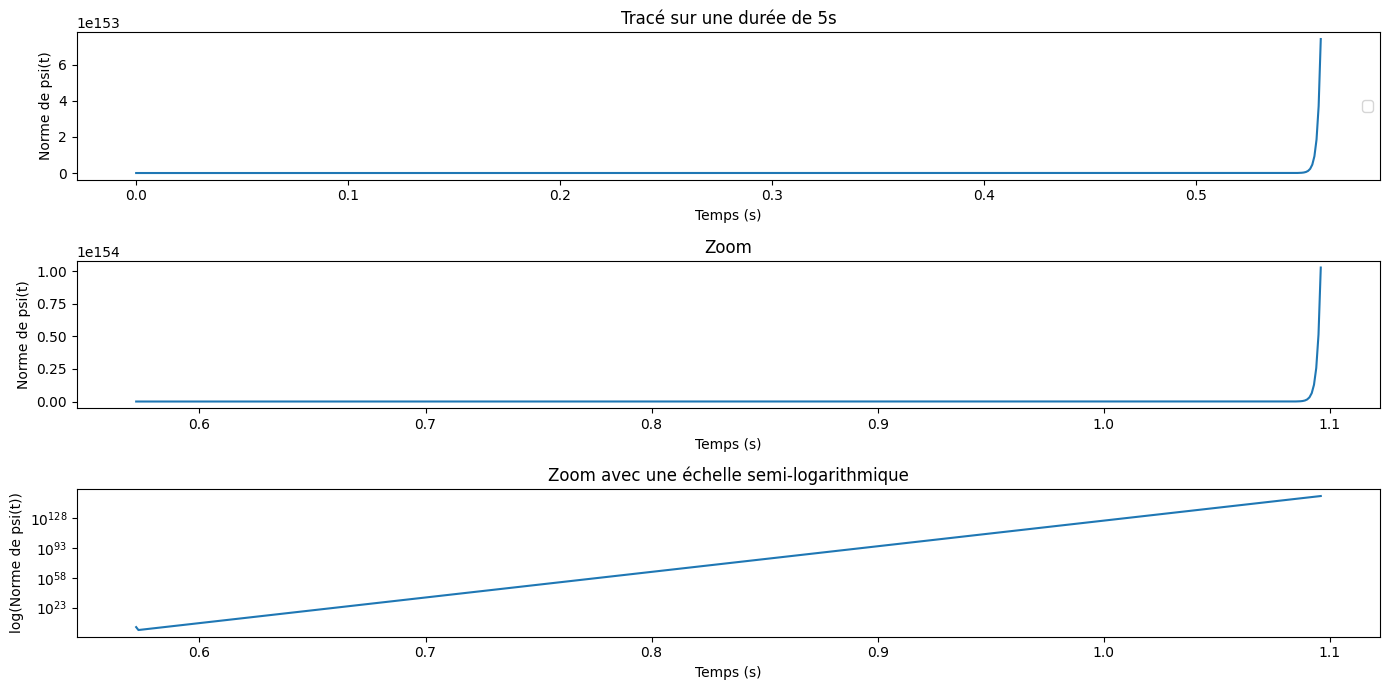

In [40]:
def euler_explicit(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    for k in range(1,n):
        psi[k] = f(psi[k-1],tps[k-1])
    return(tps,psi)

Résolution_a = euler_explicit(psi_0,0.000001,5,E,delta,dt)
Temps = Résolution_a[0]
Norme_psi = np.linalg.norm(Résolution_a[1],ord=2,axis=1)

Résolution_b = euler_explicit(psi_0,0.572,1.2,E,delta,dt)
Temps_b = Résolution_b[0]
Norme_psi_b = np.linalg.norm(Résolution_b[1],ord=2,axis=1)

Résolution_c = euler_explicit(psi_0,0.572,1.2,E,delta,dt)
Temps_c = Résolution_b[0]
Norme_psi_c = np.linalg.norm(Résolution_b[1],ord=2,axis=1)

plt.figure()

plt.subplot(3, 1, 1)
plt.plot(Temps,Norme_psi)
plt.legend(loc="center right")
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 5s")

plt.subplot(3, 1, 2)
plt.plot(Temps_b,Norme_psi_b)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Zoom")

plt.subplot(3, 1, 3)
plt.plot(Temps_c,Norme_psi_c)
plt.semilogy()
plt.xlabel("Temps (s)")
plt.ylabel("log(Norme de psi(t))")
plt.title("Zoom avec une échelle semi-logarithmique")

plt.tight_layout()
plt.show()

On observe que la solution explose en temps fini, puisque les capacités de la machine ne sont plus suffisantes pour calculer la norme de $\psi (t)$ au bout de près de 1.1s.
On en déduit que..... 

$\lVert \psi (t) \rVert$ et $\lVert \log (\psi (t)) \rVert$